In [14]:
# %matplotlib notebook
import matplotlib.pylab as plt

import numpy as np
import pandas as pd

In [1]:
#https://www.astronomerstelegram.org/?read=15681
#https://www.astronomerstelegram.org/?read=15682

t0_utc="2022-10-14T19:21:39.100"
t0_radio_isot="2022-10-14 19:21:47"
t1_rel_days=-1
t2_rel_days=1.5
source_name="SGR 1935+2154"

In [2]:
import astropy.io.fits as fits
from astropy import units as u
from astropy import constants as const


In [3]:
from astropy.coordinates import SkyCoord
from astroquery.simbad import Simbad
t=Simbad.query_object(source_name)
source_coord = SkyCoord(t[0]['RA'], t[0]['DEC'], unit=("hourangle", "deg"))
source_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (293.732, 21.89672222)>

In [4]:
import importlib
import integralclient as ic
importlib.reload(ic)
ic.__file__

failed to get AUTH with env due to: 'K8S_SECRET_INTEGRAL_CLIENT_SECRET'
got AUTH with homefile for integral-limited
failed to get AUTH with env due to: 'K8S_SECRET_INTEGRAL_CLIENT_SECRET'
got AUTH with homefile for integral-limited


2022-10-15 08:50:43 savchenk-NG-VN7-793G-79EG root[3122718] INFO selecting timesystem endpoint https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/


'/home/savchenk/miniconda-recent/lib/python3.9/site-packages/integralclient/__init__.py'

In [9]:
scwid = ic.converttime("UTC", t0_utc, "SCWID")
scwid

2022-10-15 08:52:55 savchenk-NG-VN7-793G-79EG root[3122718] INFO url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//timesystem/api/v1.0/converttime/UTC/2022-10-14T19:21:39.100/SCWID


'256000260021'

In [7]:
ic.get_sc(t0_utc, source_coord.ra.deg, source_coord.dec.deg)

{'barytime': 0.13946831843384783,
 'bodies': {'earth': {'body_dec': -70.9,
   'body_distance': 0,
   'body_in_sc': [88.42659922557306, 166.09741008968112],
   'body_ra': 16.589,
   'body_size': 2.7452596549832515,
   'integral_parallax': 57.29577951308232,
   'separation': 132967.9},
  'moon': {'body_dec': -70.9,
   'body_distance': 400049.6242135903,
   'body_in_sc': [135.70302016496785, -120.59500792469717],
   'body_ra': 16.589,
   'body_size': 0.2584839117170279,
   'integral_parallax': 19.787025287736668,
   'separation': 385025.0035026371},
  'sun': {'body_dec': -70.9,
   'body_distance': 149207397.56850898,
   'body_in_sc': [75.20592439546014, 0.06433284040180416],
   'body_ra': 16.589,
   'body_size': 0.2671936211847666,
   'integral_parallax': 0.05106824019309174,
   'separation': 149182729.85150117}},
 'd_scx': 21.599627791650324,
 'd_scy': 91.88601499850184,
 'd_scz': 111.50854348032624,
 'dyz_scy': 95.12931429865779,
 'dyz_scz': 174.87068569417505,
 'ephs': {'alt': 132967.9

In [56]:
t0_ijd = float(ic.converttime("UTC", t0_utc, "IJD"))
ic.converttime("UTC", t0_utc, "ANY")

2022-10-15 10:30:03 savchenk-NG-VN7-793G-79EG root[3122718] INFO url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//timesystem/api/v1.0/converttime/UTC/2022-10-14T19:21:39.100/IJD
2022-10-15 10:30:03 savchenk-NG-VN7-793G-79EG root[3122718] INFO url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//timesystem/api/v1.0/converttime/UTC/2022-10-14T19:21:39.100/ANY


{'IJD': '8322.807503287037',
 'OBT': '9111961777612277',
 'OBTFITS': '    2    99909327   402933 :    32 24391 60662  9717',
 'REVNUM': '2560',
 'SCWID': '256000260021',
 'UTC': '2022-10-14T19:21:39.100',
 'YYYYDDDHH': '202228719'}

In [ ]:
#TODO: detector corner events

In [12]:
# lcr = fits.open("/mnt/sshfs/isdc-in01//unsaved_data/savchenk/data/reduced/ddcache//byscw/2222/222200240010.000/ii_light.v0//410f20a7//lcr.fits.gz")

i_evts = fits.open(f"/mnt/sshfs/cdcihn/isdc/pvphase/nrt/ops/scw/{scwid[:4]}/{scwid}.000/isgri_events.fits.gz")[3].data
# i_evts_en = fits.open(f"/mnt/sshfs/isdc-in01/gpfs0/savchenk/work/tmp/byscw/{scwid:4}/{scwid}.000/ISGRIEvents.v3/107e6d59/isgri_events_corrected_tagged.fits.gz")[1].data

Text(0.5, 0, 'seconds since 2022-10-14T19:22:48.284')

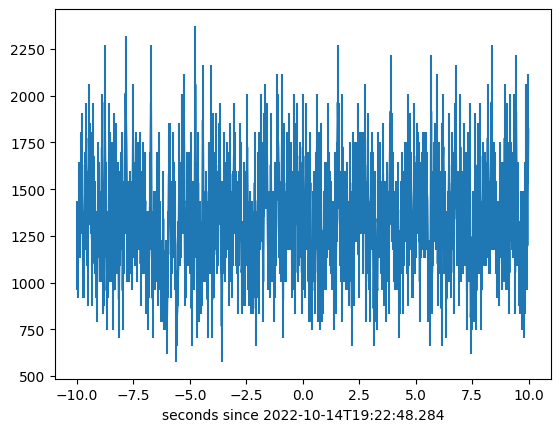

In [40]:
plt.figure()
from astropy import time

t_rel_s = (i_evts['TIME'] - t0_ijd)*24*3600

h = np.histogram(t_rel_s, bins=np.linspace(-10, 10, 60*2*4))
t1 = h[1][:-1]
t2 = h[1][1:]
tc = (t1 + t2)/2.
dt = (t2 - t1)/2.
plt.errorbar(
    tc,
    h[0]/dt,
    h[0]**0.5/dt,
    label='ISGRI cts/s'
)

plt.xlabel(f'seconds since {time.Time(t0_ijd+51544, format="mjd").isot}')

In [21]:
acslc = ic.get_hk_genlc('ACS', t0_ijd, 30)
acslc

https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/8322.8075032870365249/30


array([(8322.80715628, 1.82919321e-02, 5248., 69669.11829189),
       (8322.80715686, 6.82930753e-02, 5346., 69669.16829303),
       (8322.80715743, 1.18292333e-01, 5278., 69669.21829229), ...,
       (8322.80784899, 5.98683294e+01, 5312., 69728.96832936),
       (8322.80784956, 5.99183306e+01, 5332., 69729.0183305 ),
       (8322.80785014, 5.99683298e+01, 5364., 69729.06832976)],
      dtype=[('t_ijd', '<f8'), ('t_rel', '<f8'), ('counts', '<f8'), ('t_since_midnight', '<f8')])

In [22]:
recent_crab_cts = 254.71825
crab_flux = 1e-8

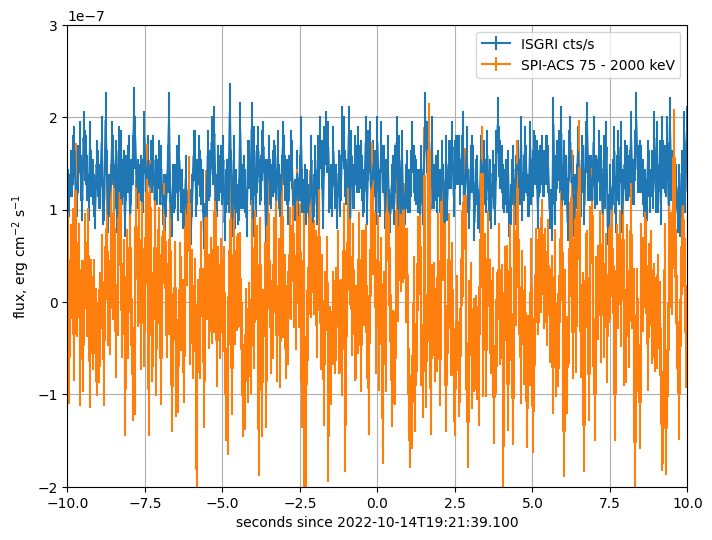

In [52]:
plt.figure(figsize=(8,6))

acstoflux=7e-10

# m = lc['ERROR']<1e6 #np.nanquantile(lc['ERROR'], 0.999)

# plt.errorbar(
#     (lc[m]['TIME'] - t0_ijd)*24*3600, 
#     lc[m]['RATE']/recent_crab_cts*crab_flux, 
#     lc[m]['ERROR']/recent_crab_cts*crab_flux,
#     ds='steps-mid',    
#     label="ISGRI 25 - 80 keV"
# )


t_rel_s = (i_evts['TIME'] - t0_ijd)*24*3600

h = np.histogram(t_rel_s, bins=np.linspace(-10, 10, 60*2*4))
t1 = h[1][:-1]
t2 = h[1][1:]
tc = (t1 + t2)/2.
dt = (t2 - t1)/2.

isgri_count_fluence = 1e-10

plt.errorbar(
    tc,
    h[0]/dt*isgri_count_fluence,
    h[0]**0.5/dt*isgri_count_fluence,
    label='ISGRI cts/s'
)


plt.errorbar(
    (acslc['t_ijd']-t0_ijd)*24*3600, 
    (acslc['counts'] - np.nanmean(acslc['counts']))*acstoflux, 
    (acslc['counts']**0.5)*acstoflux, 
    ds='steps-mid',    
    label="SPI-ACS 75 - 2000 keV")


plt.xlabel("seconds since "+t0_utc)
plt.ylabel("flux, erg cm$^{-2}$ s$^{-1}$")



plt.xlim([-10, 10.])
plt.ylim([-2e-7, 3e-7])

plt.legend()

plt.grid()

plt.savefig("sgr_isgri_acs.png")

In [103]:
m_on = (lc[m]['TIME'] - t0_ijd)*24*3600 < -0.5
m_on = (lc[m]['TIME'] - t0_ijd)*24*3600 > -2

0.01*np.sum((lc[m]['RATE']/recent_crab_cts*crab_flux)[m_on]), np.sum((lc[m]['ERROR']/recent_crab_cts*crab_flux)[m_on])

(2.2044152501621285e-07, 0.0032837328)

In [104]:
lcs={}

for hs in ["3391ab25", "7d30ee49", "2909a9d3"]:
    e=fits.open("/mnt/sshfs/isdc-in01/unsaved_data/savchenk/data/reduced/ddcache//byscw/2222/222200240010.000/ii_light.v0/"+hs+"/lcr.fits.gz")[2]
    lcs[(e.header['E_MIN'], e.header['E_MAX'])] = e.data

In [105]:
import requests
orb=requests.get("https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/integralhk/api/v1.0/sc/2020-04-28T14:33:14/2020-04-28T14:36:34?source=nrt&onlycolumns=XYZPOS").json()
orb

{'attitude': {'APD_AMP': [],
  'ATT_SEQ': [],
  'CONTINGENCY': [],
  'DEC_DIFF': [],
  'DEC_SCX': [],
  'DEC_SCZ': [],
  'DEC_STAR': [],
  'DURATION': [],
  'DURATION_DAYS': [],
  'OTF_THR': [],
  'POINTING_ID': [],
  'POINTING_TIME': [],
  'POINTING_TYPE': [],
  'RA_DIFF': [],
  'RA_SCX': [],
  'RA_SCZ': [],
  'RA_STAR': [],
  'SLEW_TIME': [],
  'SRC_ID': [],
  'STAR_NUM': [],
  'SUN_ASPECT': [],
  'TIME': []},
 'orbit': {'DAYBEG': [7423.58864474074, 7423.63000674074],
  'DAYEND': [7423.63000674074, 7423.67359874074],
  'DURATION_DAYS': [0.041361999999935506, 0.04359199999998964],
  'EPOCH': [7423.60932567974, 7423.65180277974],
  'NREC': [0, 0],
  'OMOTIN': [36589.44339, 36588.65165],
  'ORBIN': [2222.252, 2222.268],
  'RDIST': [127862.525, 131262.176],
  'SMAXIS': [81111.62965, 81110.45955],
  'TIME': [7423.58864474074, 7423.63000674074],
  'XPOS': [-58382.665, -58713.122],
  'YPOS': [-49686.412, -52926.911],
  'ZPOS': [102330.593, 104791.556]}}

In [106]:
int_coord = SkyCoord(
    orb['orbit']['XPOS'][0], 
    orb['orbit']['YPOS'][0], 
    orb['orbit']['ZPOS'][0],
    representation_type='cartesian',
    frame='fk5',
).represent_as('spherical')

#source_coord.representation, 
int_coord

<SphericalRepresentation (lon, lat, distance) in (rad, rad, )
    (3.84669444, 0.92782426, 127862.52529052)>

In [107]:
ephs = [220.347, 53.166, 127752.9]

int_ephs_coord = SkyCoord(ephs[0], ephs[1], unit="deg")

int_ephs_coord.separation(source_coord).deg

62.77142644162806

In [123]:

np.cos(int_ephs_coord.separation(source_coord).rad)*(ephs[2]*1000*u.km/const.c)

<Quantity 0.1949757 km s / m>

<IPython.core.display.Javascript object>


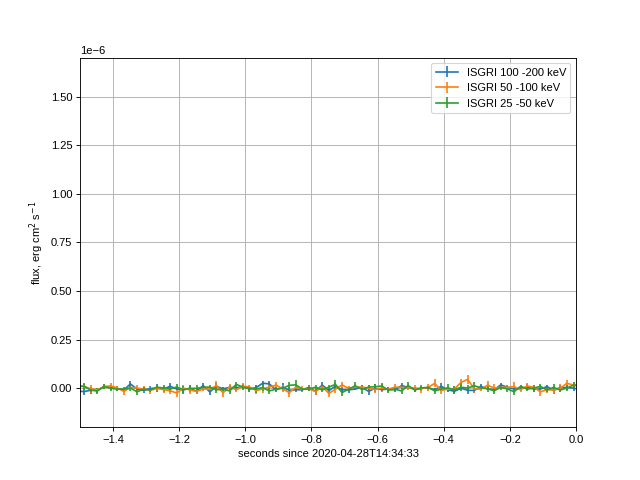

/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


In [109]:
plt.figure(figsize=(8,6))

for (e1,e2), elc in  lcs.items():
    m = elc['ERROR'] < 1e9 #np.nanquantile(lc['ERROR'], 0.999)

    plt.errorbar(
        (elc[m]['TIME'] - t0_ijd)*24*3600, 
        elc[m]['RATE']/recent_crab_cts*crab_flux, 
        elc[m]['ERROR']/recent_crab_cts*crab_flux,
        label="ISGRI %.5lg -%.5lg keV"%(e1,e2)
    )

plt.xlabel("seconds since "+t0_utc)
plt.ylabel("flux, erg cm$^2$ s$^{-1}$")


plt.xlim([-1.5, 0.])
plt.ylim([-2e-7, 1.7e-6])

plt.legend()

plt.grid()


In [110]:
np.nanmax((lc[m]['RATE']/recent_crab_cts*crab_flux)[m_on]), np.nanmax((lc[m]['ERROR']/recent_crab_cts*crab_flux)[m_on])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 178543 but corresponding boolean dimension is 89267

In [111]:
np.max(lc[m]['RATE']/lc[m]['ERROR'])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 178543 but corresponding boolean dimension is 89267

In [112]:
np.quantile(lc['ERROR'], 0.99)

nan

In [117]:
import matplotlib as mpl
mpl.style.use("seaborn-white")

In [271]:
print(t0_utc)
sc = ic.get_sc(t0_utc, ra=source_coord.ra.deg, dec=source_coord.dec.deg)
dt_intgeo = sc['barytime']
sc

2020-04-28T14:34:33


{'barytime': 0.19488458844505294,
 'bodies': {'earth': {'body_dec': -53.166,
   'body_distance': 0,
   'body_in_sc': [68.78100889407858, -23.169569323748796],
   'body_ra': 40.351999999999975,
   'body_size': 2.857109177402191,
   'integral_parallax': 57.29577951308232,
   'separation': 127762.5},
  'moon': {'body_dec': -53.166,
   'body_distance': 387809.46463591885,
   'body_in_sc': [140.90641096987028, 58.35007146629686],
   'body_ra': 40.351999999999975,
   'body_size': 0.24873101974805706,
   'integral_parallax': 18.29504715633917,
   'separation': 400122.06404746755},
  'sun': {'body_dec': -53.166,
   'body_distance': 150644123.18493366,
   'body_in_sc': [100.05946204545096, 0.13948569495813695],
   'body_ra': 40.351999999999975,
   'body_size': 0.2645162765763519,
   'integral_parallax': 0.048577347687345354,
   'separation': 150692707.16785437}},
 'd_scx': 8.081913022843379,
 'd_scy': 82.99018750470754,
 'd_scz': 85.99767284471338,
 'dyz_scy': 29.766105465328398,
 'dyz_scz': 60

In [15]:
plt.figure()

tref=0.104

#for period in np.linspace(0.02, 0.04, 30):

#plt.hist(t-period*(t/period).astype(int), 100)

period=0.032*3
_t = t[(t>0.07) & (t<0.15)]

def t2phase(x):
    #return (x-tref) - period*np.floor((x-tref)/period)
    return (x-tref)/period
#

h=plt.hist(t2phase(_t), int((_t.max()-_t.min())/0.001)) #, alpha=0.3)
    
period=0.033

if False:
    plt.figure()
    h=plt.hist(t, np.linspace(-1., 1., 500))

    plt.plot(h[1], 
             t2phase(h[1])*100, 300)

    plt.ylim([-30, 30])

TypeError: '>' not supported between instances of 'Table' and 'float'

<Figure size 640x480 with 0 Axes>

In [314]:
t2phase(h[1])

array([-1.89812671e-02, -1.09908400e-02, -3.00041280e-03, -2.50099856e-02,
       -1.70195585e-02, -9.02913130e-03, -1.03870413e-03, -2.30482770e-02,
       -1.50578498e-02, -7.06742262e-03, -2.90769954e-02, -2.10865683e-02,
       -1.30961411e-02, -5.10571394e-03, -2.71152868e-02, -1.91248596e-02,
       -1.11344324e-02, -3.14400526e-03, -2.51535781e-02, -1.71631509e-02,
       -9.17272375e-03, -1.18229658e-03, -2.31918694e-02, -1.52014422e-02,
       -7.21101507e-03, -2.92205879e-02, -2.12301607e-02, -1.32397336e-02,
       -5.24930639e-03, -2.72588792e-02, -1.92684521e-02, -1.12780249e-02,
       -3.28759771e-03, -2.52971705e-02, -1.73067434e-02, -9.31631620e-03,
       -1.32588903e-03, -2.33354619e-02, -1.53450347e-02, -7.35460753e-03,
       -2.93641804e-02, -2.13737532e-02, -1.33833260e-02, -5.39289885e-03,
       -2.74024717e-02, -1.94120445e-02, -1.14216173e-02, -3.43119017e-03,
       -2.54407630e-02, -1.74503358e-02, -9.45990866e-03, -1.46948149e-03,
       -2.34790543e-02, -

In [ ]:
I
        import BayesBlocks

        bb = BayesBlocks.bblock(pd.DataFrame(dict(TIME=x)))
        bb.find_blocks(0.1)

        h_blocks = np.histogram(x,bins=x[bb.change_points])
        
        burst_data['t1_rel_s'] = h_blocks[1][1]
        burst_data['t2_rel_s'] = h_blocks[1][-2]
        burst_data['length_s'] = burst_data['t2_rel_s']-burst_data['t1_rel_s']
        
        burst_data['bblock_success'] = (burst_data['t2_rel_s']-burst_data['t1_rel_s'])<1.
        
        if not burst_data['bblock_success'] :
            plt.title("fail!")
        
        burst_data['nevents_%.5lg_%.5lg'%(e1,e2)] = sum( (x>=burst_data['t1_rel_s']) & (x<=burst_data['t2_rel_s']) ) 
        burst_data['nevents_mgr50_%.5lg_%.5lg'%(e1,e2)] = sum( (x>=burst_data['t1_rel_s']-0.05) & (x<=burst_data['t2_rel_s']+0.05) ) 
        
        burst_data['bkg_pre_cts'] = h_blocks[0][0]/(h_blocks[1][1]-h_blocks[1][0])
        burst_data['bkg_post_cts'] = h_blocks[0][-1]/(h_blocks[1][-1]-h_blocks[1][-2])
        burst_data['bkg_av_cts'] = (burst_data['bkg_post_cts'] + burst_data['bkg_pre_cts'])/2.
        burst_data['nevents_bkg'] = burst_data['bkg_av_cts'] * burst_data['length_s']
        
        plt.axvspan(burst_data['t1_rel_s'], burst_data['t2_rel_s'], alpha=0.1, color="g",
                   label="%.5lg - %.5lg"%(burst_data['t1_rel_s'], burst_data['t2_rel_s']))
        
        plt.axhline(burst_data['bkg_post_cts'])
        plt.axhline(burst_data['bkg_pre_cts'])
        
        plt.step( h_blocks[1],
                  np.concatenate([h_blocks[0]/(h_blocks[1][1:] - h_blocks[1][:-1]), [0]]),
                  color='m',
                  where='post',
                  label="bblocks"
                )
        

In [458]:
# DM estimate

DM=332.81
DM_err=0.1

nu=400*u.MHz

dt_dm_s = (4.15*u.ms*DM/(nu/u.GHz)**2).to(u.s).value
dt_dm_err_s = (4.15*u.ms*DM_err/(nu/u.GHz)**2).to(u.s).value
dt_dm_s, dt_dm_err_s

print("dm difference", dt_dm_s)

radiotopo_s=(6300.*u.km/const.c).to(u.s).value

t0_dmcorr_ijd = t0_ijd - dt_dm_s/24/3600.
t0_dmcorr_utc = ic.converttime("IJD", t0_dmcorr_ijd, "UTC")


t_refplot_utc = "2020-04-28T14:34:24.0"
t_refplot_ijd = float(ic.converttime("UTC", t_refplot_utc, "IJD"))
t_refplot_ijd

dm difference 8.632259375000002
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.6080272192202756/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/UTC/2020-04-28T14:34:24.0/IJD


7423.608022962963

In [128]:
t_radio_det400_ijd = float(ic.converttime("UTC", "2020-04-28T14:34:33", "IJD"))

extra_offset_radio=0.106/24/3600.

t_radio_detinf_ijd = t_radio_det400_ijd - dt_dm_s/24/3600  + extra_offset_radio # 
t_radio_p1_ijd = t_radio_detinf_ijd - 0.014/24./3600
t_radio_p2_ijd = t_radio_detinf_ijd + 0.02/24./3600


ic.converttime("IJD", t_radio_p1_ijd, "UTC")

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/UTC/2020-04-28T14:34:33/IJD
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.6080282840348445/UTC


'2020-04-28T14:34:24.459'

In [129]:
from scipy.stats import norm


In [13]:
ebands = [(25,200), (0,25),]

plt.figure(figsize=(7,6))

rates={}

bins = None

for e1,e2 in ebands:
    m = i_evts_en['ISGRI_ENERGY']>=e1
    m &= i_evts_en['ISGRI_ENERGY']<e2

    t_plot_s = (i_evts['TIME'] + dt_intgeo/24/3600 -t_refplot_ijd)*24*3600

    m &= np.abs(t_plot_s)<2
    
    if bins is None:
        _ts = t_plot_s[m]
        bins=np.linspace(_ts.min(), _ts.max(), int((_ts.max()-_ts.min())/0.001))
    
    h = np.histogram(t_plot_s[m], bins=bins)
    
    if isinstance(bins, int):
        bins = h[1]
    
    tc = (h[1][1:] + h[1][:-1])*0.5
    dt = (h[1][1:] - h[1][:-1])
    rate = h[0]/dt
    rate_err = h[0]**0.5/dt
    
    rates[(e1,e2)] = dict(
        rate = rate,
        rate_err = rate_err,
        tc = tc,
        dt = dt,
    )
    
    if False:
        plt.errorbar(
        tc,
        rate,
        rate_err,
        ds="steps-mid",
        label="%.5lg - %.5lg keV"%(e1,e2),
    )
    
    plt.step(
        tc,
        rate,
        ds="steps-mid",
        label="%.5lg - %.5lg keV"%(e1,e2),
        alpha=0.5,
    )
    

    
#plt.axvspan(
#    (t_radio_p1_ijd - t_refplot_ijd)*24*3600 - radiotopo_s,
#    (t_radio_p2_ijd - t_refplot_ijd)*24*3600 + radiotopo_s,
#    alpha=0.2,
#)

#plt.axvline(
#    (t_radio_detinf_ijd - t_refplot_ijd)*24*3600,
#    alpha=0.5,
#    label="radio ref",
#    lw=2,
#)


#plt.axvline(
#    (t_radio_p1_ijd - t_refplot_ijd)*24*3600,
#    alpha=0.2,
#    label="radio 1",
#)

plt.axvline(
    (t_radio_p2_ijd - t_refplot_ijd)*24*3600,
    alpha=0.2,
    label="radio 2",
)

#print("dt:")

t_r1_r = 0.461
t_w_r12_r = 0.002
t_r2_r =t_r1_r + 0.032

bkg = norm(0.47, 0.06).pdf(tc)*1200
r1 = norm(t_r1_r, t_w_r12_r).pdf(tc)*40
r2 = norm(t_r2_r, t_w_r12_r).pdf(tc)*40

plt.plot(tc,bkg)
#plt.plot(tc,r1)
#plt.plot(tc,r2)
plt.plot(tc,r2+r1+bkg)


plt.xlim([.2, 0.8])
#plt.xlim([.40, 0.55])
plt.ylabel("ISGRI count rate")
plt.xlabel("seconds since "+t_refplot_utc+" UTC at Geocenter; dt: %.3lg"%np.mean(dt))

plt.axvspan(0.45, 0.5, alpha=0.2, color='magenta', label='on-peak spec')
plt.axvspan(0.35, 0.65, alpha=0.2, color='green', label='average spec')
    
plt.legend()

plt.savefig("lc_peakandspec.pdf")

plt.show()

NameError: name 'plt' is not defined

2020-05-03T23:25:13.262
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/UTC/2020-05-03T23:25:13.262/ANY


<IPython.core.display.Javascript object>


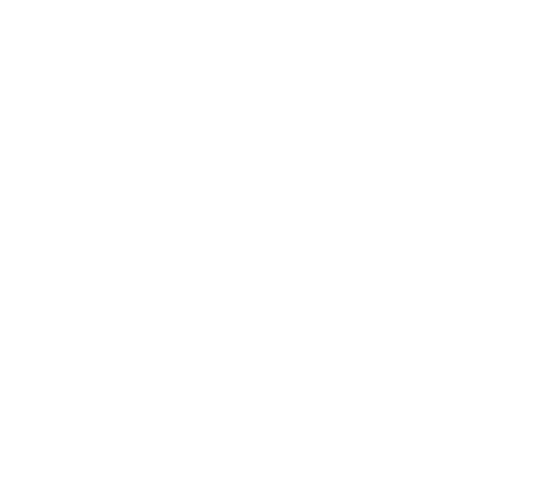

events in selection 0


ValueError: zero-size array to reduction operation minimum which has no identity

In [289]:
t_refplot_utc = "2020-05-03T23:25:13.262"


print(t_refplot_utc)
sc = ic.get_sc(t_refplot_utc, ra=source_coord.ra.deg, dec=source_coord.dec.deg)
dt_intgeo = sc['barytime']
sc

tc = ic.converttime("UTC", t_refplot_utc, "ANY")
scwid = tc['SCWID']

t_refplot_ijd = float(tc['IJD'])

i_evts=fits.open("/mnt/sshfs/isdc-in01//unsaved_data/neronov/data/reduced/ddcache-private-staging-1.2//byscw/{}/{}.000/evts_extract.v0//81903a67/source_evts.fits.gz".format(scwid[:4], scwid))[2].data
i_evts_en=i_evts

#i_evts = fits.open("/mnt/sshfs/isdc-in01/isdc/pvphase/nrt/ops/scw/"+scwid[:4]+"/"+scwid+".000/isgri_events.fits.gz")[3].data
#i_evts_en = fits.open("/mnt/sshfs/isdc-in01/isdc/pvphase/nrt/ops/scw/"+scwid[:4]+"/"+scwid+".000/isgri_events.fits.gz")[3].data
#i_evts_en = fits.open("/mnt/sshfs/isdc-in01/gpfs0/savchenk/work/tmp/byscw/2222/222200240010.000/ISGRIEvents.v3/107e6d59/isgri_events_corrected_tagged.fits.gz")[1].data

ebands = [(0,2000), ]

plt.figure(figsize=(7,6))

rates={}

bins = None

tbin = 0.02

for e1,e2 in ebands:
    m = i_evts_en['ENERGY']>=e1
#    m &= i_evts_en['ENERGY']<e2

    t_plot_s = (i_evts['TIME'] + dt_intgeo/24/3600 -t_refplot_ijd)*24*3600

    m &= np.abs(t_plot_s)<2

    print("events in selection", sum(m))
    
    
    if bins is None:
        _ts = t_plot_s[m]
        bins=np.linspace(_ts.min(), _ts.max(), int((_ts.max()-_ts.min())/tbin))
    
    h = np.histogram(t_plot_s[m], bins=bins)
    
    if isinstance(bins, int):
        bins = h[1]
    
    tc = (h[1][1:] + h[1][:-1])*0.5
    dt = (h[1][1:] - h[1][:-1])
    rate = h[0]/dt
    rate_err = h[0]**0.5/dt
    
    rates[(e1,e2)] = dict(
        rate = rate,
        rate_err = rate_err,
        tc = tc,
        dt = dt,
    )
    
    if False:
        plt.errorbar(
        tc,
        rate,
        rate_err,
        ds="steps-mid",
        label="%.5lg - %.5lg keV"%(e1,e2),
    )
    
    plt.step(
        tc,
        rate,
        ds="steps-mid",
        label="%.5lg - %.5lg keV"%(e1,e2),
        alpha=0.5,
    )
    

    
#plt.axvspan(
#    (t_radio_p1_ijd - t_refplot_ijd)*24*3600 - radiotopo_s,
#    (t_radio_p2_ijd - t_refplot_ijd)*24*3600 + radiotopo_s,
#    alpha=0.2,
#)

#plt.axvline(
#    (t_radio_detinf_ijd - t_refplot_ijd)*24*3600,
#    alpha=0.5,
#    label="radio ref",
#    lw=2,
#)


#plt.axvline(
#    (t_radio_p1_ijd - t_refplot_ijd)*24*3600,
#    alpha=0.2,
#    label="radio 1",
#)


#print("dt:")



plt.xlim([-2, 2])
#plt.xlim([.40, 0.55])
plt.ylabel("ISGRI count rate")
plt.xlabel("seconds since "+t_refplot_utc+" UTC at Geocenter")
    
plt.legend()

plt.savefig("lc_peakandspec.pdf")

plt.show()

In [291]:
i_evts

FITS_rec([],
         dtype=(numpy.record, [('DETY', '>f4'), ('DETZ', '>f4'), ('ENERGY', '>f4'), ('EVNT_TYPE', '>i4'), ('TIME', '>f8'), ('TIMEDEL', '>f8')]))

In [284]:
i_evts[2].data

FITS_rec([],
         dtype=(numpy.record, [('DETY', '>f4'), ('DETZ', '>f4'), ('ENERGY', '>f4'), ('EVNT_TYPE', '>i4'), ('TIME', '>f8'), ('TIMEDEL', '>f8')]))

In [279]:
!ls -lotr /mnt/sshfs/isdc-in01//unsaved_data/neronov/data/reduced/ddcache-private-staging-1.2//byscw/2224/222400270010.000/evts_extract.v0//81903a67/source_evts.fits.gz

-rw-r--r-- 1 savchenk 2617 mai    6 17:50 /mnt/sshfs/isdc-in01//unsaved_data/neronov/data/reduced/ddcache-private-staging-1.2//byscw/2224/222400270010.000/evts_extract.v0//81903a67/source_evts.fits.gz


In [443]:
from astropy.time import Time


url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7425.9047701415374831/ANY


{'CCSDS': '6407782967907451108 58ed04a8cfec00e4',
 'IJD': '7425.9047701415374831',
 'IJS': '641598172.140228867531',
 'MJD': '58969.904770141540',
 'OBT': '9030705167745167',
 'REVNUM': '2223',
 'SCWID': '222300080010',
 'TAI': '641598204.324228882790',
 'TT': '641598172.140228867531',
 'UTC': '2020-04-30T21:41:42.956',
 'YYYYDDDHH': '202012121'}

In [48]:
fast_mjd = time.Time(t0_radio_isot).mjd

ic.converttime("IJD", fast_mjd - 51544 - 8.36/24/3600, "ANY")

fast_isot = time.Time(fast_mjd, scale="utc", format='mjd').isot
print(fast_isot)

fast_nuinf_isot = time.Time(fast_mjd - 8.36/24/3600, scale="utc", format='mjd').isot
print("at inf freq", fast_nuinf_isot)

2022-10-15 10:26:58 savchenk-NG-VN7-793G-79EG root[3122718] INFO url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//timesystem/api/v1.0/converttime/IJD/8322.806697222220464/ANY


2022-10-14T19:21:47.000
at inf freq 2022-10-14T19:21:38.640


In [455]:
ic.get_sc(fast_nuinf_isot, ra=source_coord.ra.deg, dec=source_coord.dec.deg)

{'barytime': 0.07153394011168558,
 'bodies': {'earth': {'body_dec': -53.575,
   'body_distance': 0,
   'body_in_sc': [80.17258899354536, -32.23568861131782],
   'body_ra': 18.889999999999986,
   'body_size': 4.313588777573248,
   'integral_parallax': 57.29577951308232,
   'separation': 84623.6},
  'moon': {'body_dec': -53.575,
   'body_distance': 376871.3911484997,
   'body_in_sc': [121.40601012484355, 100.74355526741367],
   'body_ra': 18.889999999999986,
   'body_size': 0.2927902713964379,
   'integral_parallax': 14.264229597319288,
   'separation': 339911.46133223193},
  'sun': {'body_dec': -53.575,
   'body_distance': 150730347.94373155,
   'body_in_sc': [105.65835487007728, 0.19009940902183745],
   'body_ra': 18.889999999999986,
   'body_size': 0.2644012305159935,
   'integral_parallax': 0.03216125337170221,
   'separation': 150758276.4628632}},
 'd_scx': 12.934953230386572,
 'd_scy': 100.21512114341583,
 'd_scz': 82.1492985407199,
 'dyz_scy': 142.39774241442504,
 'dyz_scz': 52.39

In [456]:
source_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (293.732, 21.89672222)>

<IPython.core.display.Javascript object>


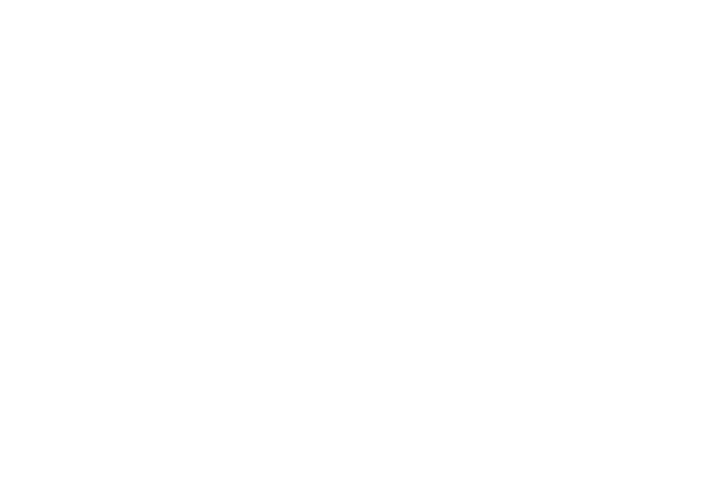

NameError: name 'NullFormatter' is not defined

In [292]:
plt.figure(figsize=(9,6))

emin=20.
emax=300.

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]


axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx, label="hx")
axHisty = plt.axes(rect_histy, label="hy")

m_on = t_plot_s>0.2
m_on &= t_plot_s<0.8

m_off = t_plot_s>0.2-2
m_off &= t_plot_s<0.8-2

m_on &= i_evts_en['ISGRI_ENERGY']>emin
m_on &= i_evts_en['ISGRI_ENERGY']<emax

h2 = np.histogram2d(
    t_plot_s[m_on],
    i_evts_en['ISGRI_ENERGY'][m_on],
    (np.linspace(t_plot_s[m_on].min(),t_plot_s[m_on].max(),300),
     np.logspace(np.log10(emin),np.log10(emax),30))
)

from scipy.ndimage.filters import gaussian_filter

fmap = gaussian_filter(h2[0], (3, 3))

axScatter.contour(
    h2[1][:-1], 
    h2[2][:-1], 
    np.transpose(
        fmap
    ),    
    levels=np.logspace(-0.5, np.log10(fmap.max()),7),
    cmap='gray_r',
    alpha=1.
)


axScatter.contourf(
        h2[1][:-1], 
        h2[2][:-1], 
        np.transpose(h2[0]),    
        levels=np.logspace(-0.5, np.log10(h2[0].max()),int(h2[0].max())),
        cmap='gray_r',
        alpha=0.5
    )



axScatter.semilogy()

axScatter.set_yticks([30., 50., 100., 200.], ["30 keV", "50 keV", "100 keV", "200 keV"])

axScatter.set_xlabel("seconds since "+t_refplot_utc+" UTC at Geocenter")
axHistx.set_title("ISGRI count rate")

axHistx.step(
                h2[1][:-1],
                h2[0].sum(1),
                c='gray'
            )

axHisty.errorbar(
                h2[0][:,:].sum(0),
                h2[2][:-1], 
                xerr=h2[0].sum(0)**0.5,
                ds='steps',
                c='gray'
            )

axHisty.semilogy()


# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)


axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.savefig("burst_2dplot.pdf")

#plt.show()


<IPython.core.display.Javascript object>


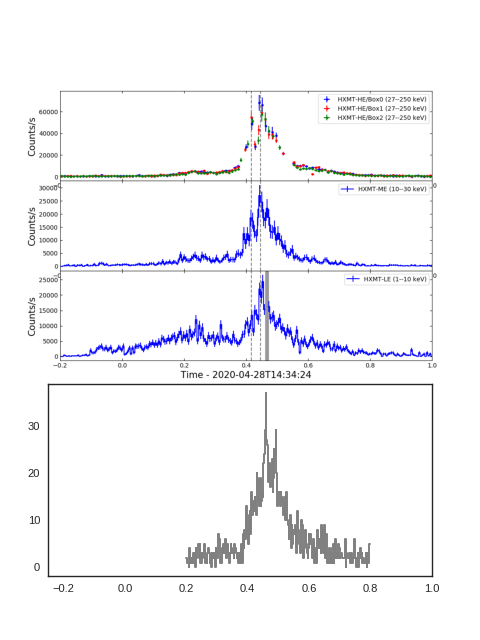

(-0.25, 1.0)

In [766]:
import io

r=requests.get("http://newshxmt.ihep.ac.cn/images/grb/SGR1935_3rd_atel.png")

import matplotlib.image as img 
insight_im = img.imread(io.BytesIO(r.content))

plt.figure(figsize=(6,8))
ax1 = plt.axes([0,0.35,1,0.6])

ax1.imshow(insight_im)
ax1.set_axis_off()

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]



ax2=plt.axes([0.1,0.1,0.8,0.3])
ax2.step(
                h2[1][:-1],
                h2[0].sum(1),
                c='gray'
            )

ax2.set_xlim([-0.25, 1.])